In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import pickle

In [3]:
with open("wide_dist_pickle.p", 'rb') as f:
    data = pickle.load(f)
mtx = data["mtx"]
dist = data["dist"]

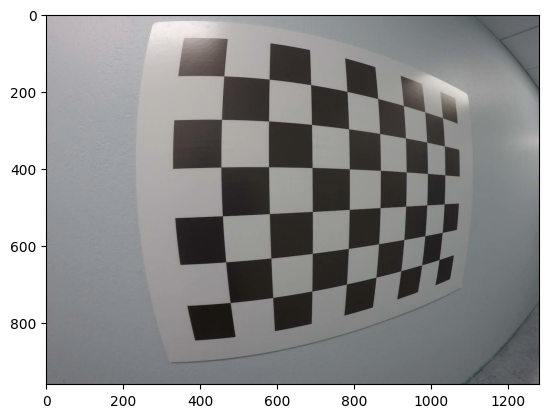

In [4]:
image_name = "test_image2.png"
image = cv2.imread(image_name)
plt.imshow(image)

In [156]:
def warp_corners(img, nx, ny, mtx, dist):
    ud_image = cv2.undistort(img, mtx, dist, None, mtx)
    gray = cv2.cvtColor(ud_image, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    if ret:
        img_size = (gray.shape[1], gray.shape[0])
        offset = 100
        src = np.float32([corners[0][0], 
                          corners[7][0], 
                          corners[40][0], 
                          corners[47][0]])
        
        dst = np.float32([[offset, offset], 
                        [img_size[0]-offset, offset],
                        [offset, img_size[1]-offset],   
                        [img_size[0]-offset, img_size[1]-offset]])
        
        M = cv2.getPerspectiveTransform(src,dst)
        warped = cv2.warpPerspective(ud_image, M, img_size, flags=cv2.INTER_LINEAR)
                            
        
    return warped, M,dst

[[ 100.  100.]
 [1180.  100.]
 [ 100.  860.]
 [1180.  860.]]


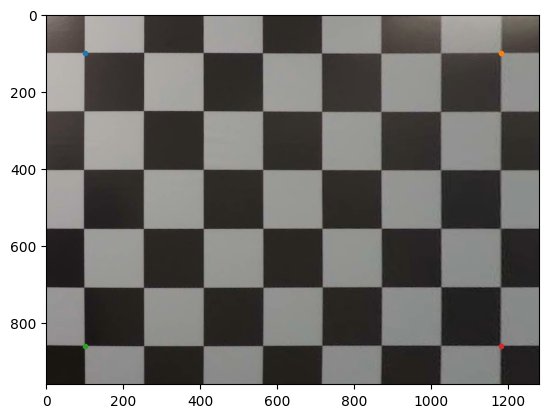

In [157]:
ud_image, M, src = warp_corners(image, 8, 6, mtx, dist)
plt.imshow(ud_image)
print(src)
plt.plot(src[0][0], src[0][1], '.')
plt.plot(src[1][0], src[1][1], '.')
plt.plot(src[2][0], src[2][1], '.')
plt.plot(src[3][0], src[3][1], '.')


